In [6]:
import pandas as pd
import matplotlib.pyplot as plt

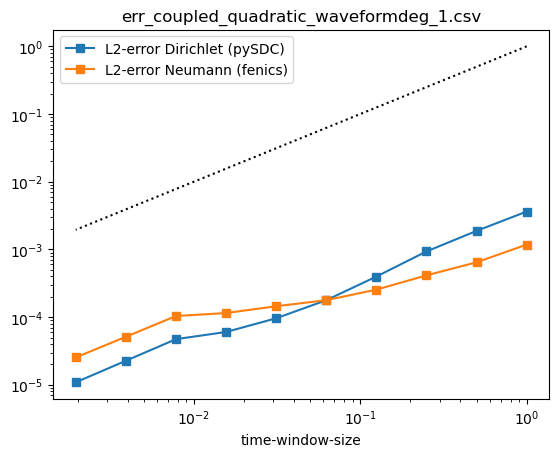

In [12]:
filename = 'err_coupled_quadratic_waveformdeg_1.csv'
df = pd.read_csv(filename)

fig, ax = plt.subplots()

df.plot(x='time-window-size', marker='s', ax=ax)

ax.set_title(filename)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)


# Plot order guides into the plot

# Set expected orders for guides
# The expected order is the number of nodes + 1
order = 1
order_guide = [1.0 / (2 ** (order*i)) for i in range(0, len(df['time-window-size']))]
ax.loglog(df['time-window-size'], order_guide, color='black', linestyle='dotted', label=f"Order {order}")